## **Installation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import warnings
# Ignoring warnings
warnings.filterwarnings("ignore")

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("FE_Strokes.csv")

In [3]:
df['birdied'] = 0
df['bogie'] = 0

In [4]:
def birdie_status(row):
    if row['hole_score'] == row['par_value'] - 1:
        return 1
    else:
        return 0

# Apply the function to create new columns
df['birdied'] = df.apply(birdie_status, axis=1)

In [5]:
def bogie_status(row):
    if row['hole_score'] == row['par_value'] + 1:
        return 1
    else:
        return 0

# Apply the function to create new columns
df['bogie'] = df.apply(bogie_status, axis=1)

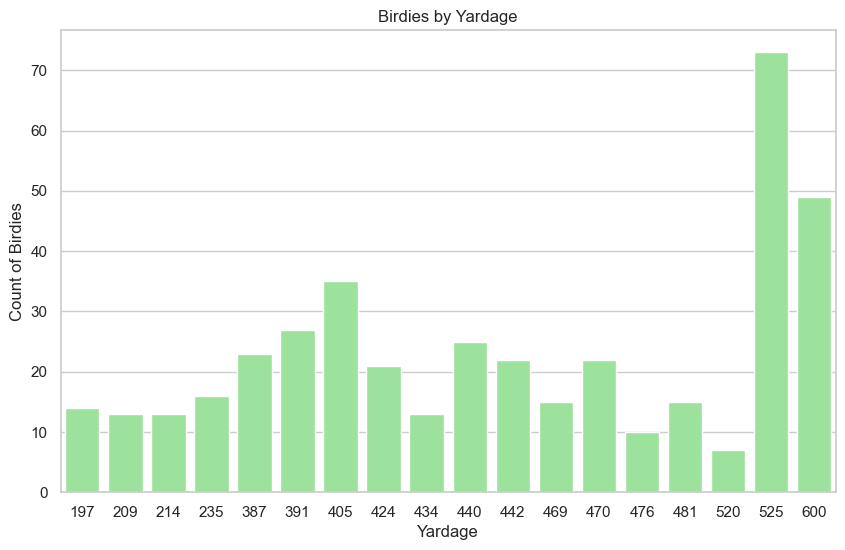

In [6]:
birdie_counts = df.groupby(['yardage', 'birdied']).size().unstack(fill_value=0).reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='yardage', y=1, data=birdie_counts, color='lightgreen')
plt.title('Birdies by Yardage')
plt.xlabel('Yardage')
plt.ylabel('Count of Birdies')
plt.show()

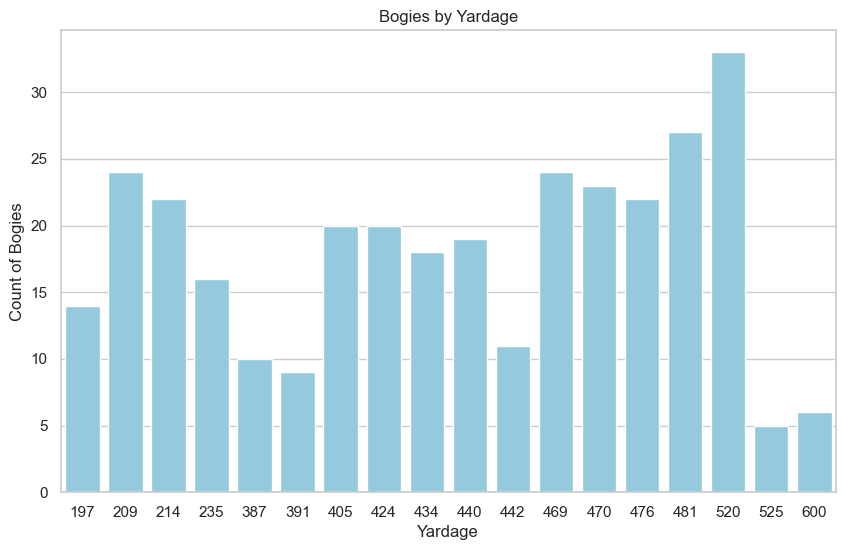

In [7]:
bogie_counts = df.groupby(['yardage', 'bogie']).size().unstack(fill_value=0).reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='yardage', y=1, data=bogie_counts, color='skyblue')
plt.title('Bogies by Yardage')
plt.xlabel('Yardage')
plt.ylabel('Count of Bogies')
plt.show()

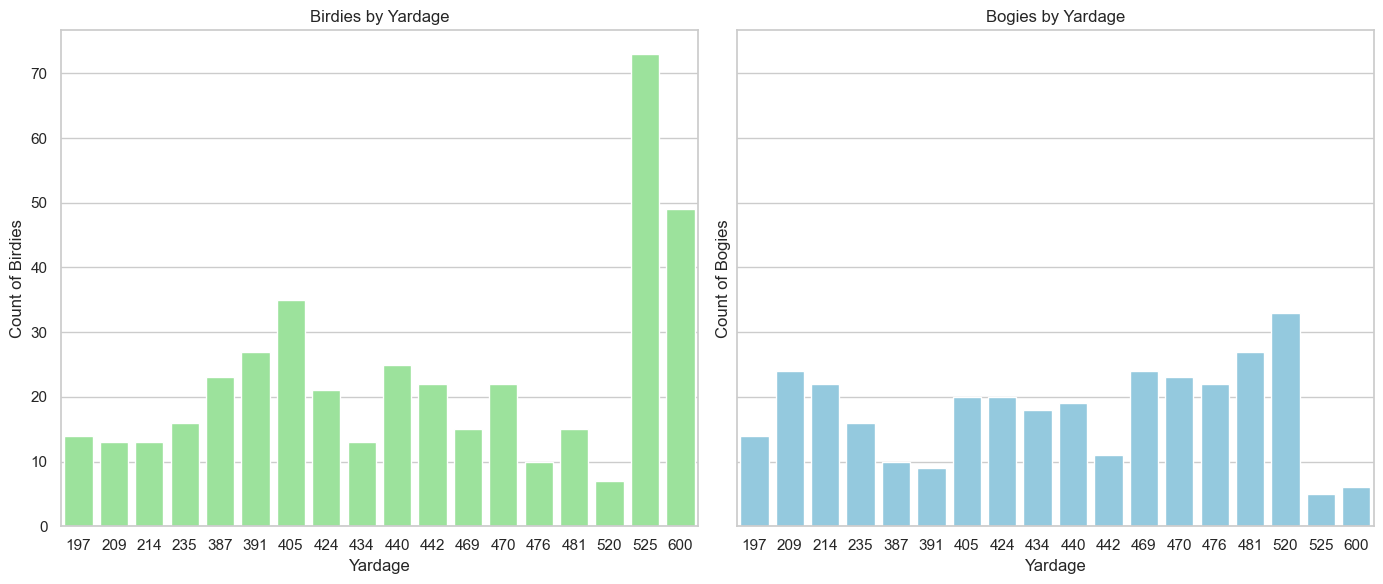

In [8]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Birdies
sns.barplot(x='yardage', y=1, data=birdie_counts, color='lightgreen', ax=axes[0])
axes[0].set_title('Birdies by Yardage')
axes[0].set_xlabel('Yardage')
axes[0].set_ylabel('Count of Birdies')

# Plot for Bogies
sns.barplot(x='yardage', y=1, data=bogie_counts, color='skyblue', ax=axes[1])
axes[1].set_title('Bogies by Yardage')
axes[1].set_xlabel('Yardage')
axes[1].set_ylabel('Count of Bogies')

plt.tight_layout()
plt.show()

# **Par 3s**

In [9]:
par_4s = df.loc[df['par_value'] == 4]

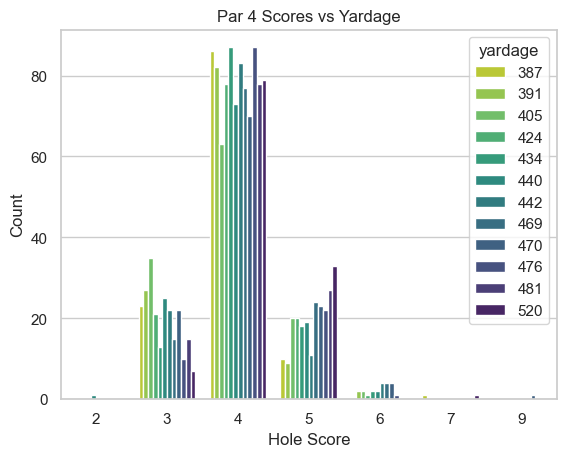

In [10]:
cmap = sns.color_palette("viridis", as_cmap=True)
reversed_cmap = cmap.reversed()

# Create a count plot with reversed hue for yardage using Seaborn
sns.countplot(x='hole_score', hue='yardage', data=par_4s,palette="viridis_r")

# Set plot title and axis labels
plt.title('Par 4 Scores vs Yardage')
plt.xlabel('Hole Score')
plt.ylabel('Count')

# Show the plot
plt.show()

# need og df!

## **Distance from Hole vs Score from Corresponding Distance**

In [11]:
df['hole_score'].min()

2

In [12]:
selected_columns = ['shot', 'hole_score','distance_to_pin', 'par_value']  # Add the column names you want to select
condensed_df = df[selected_columns]
condensed_df['ended_up_score_they_got'] = (condensed_df['hole_score'] - condensed_df['shot'])+4
condensed_df

,shot,hole_score,distance_to_pin,par_value,ended_up_score_they_got
0,1,4,15444,4,7
1,1,2,7812,3,5
2,1,4,13464,4,7
3,1,4,15768,4,7
4,1,5,18576,4,8
...,...,...,...,...,...
2155,1,3,15948,4,6
2156,1,4,18180,5,7
2157,1,4,17496,4,7
2158,1,5,16092,4,8


In [13]:
sns.set_theme(style="whitegrid", palette="Set3")

kelly_green = (0/255, 128/255, 0/255)

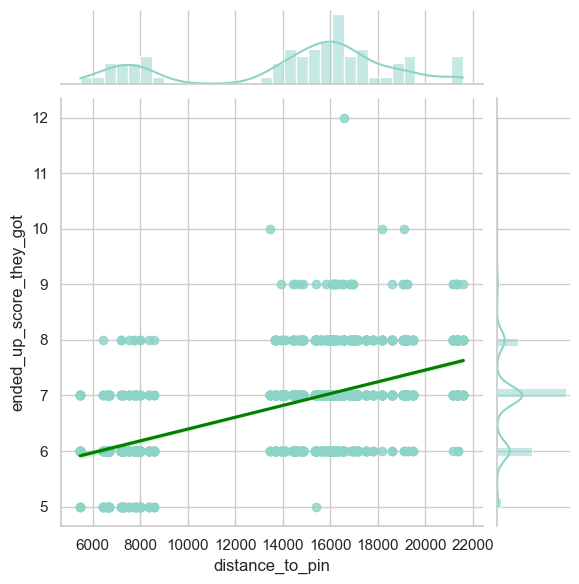

In [14]:
sns.jointplot(
    data=condensed_df, 
    x="distance_to_pin", 
    y="ended_up_score_they_got", 
    kind="reg", 
    line_kws={"color": kelly_green})

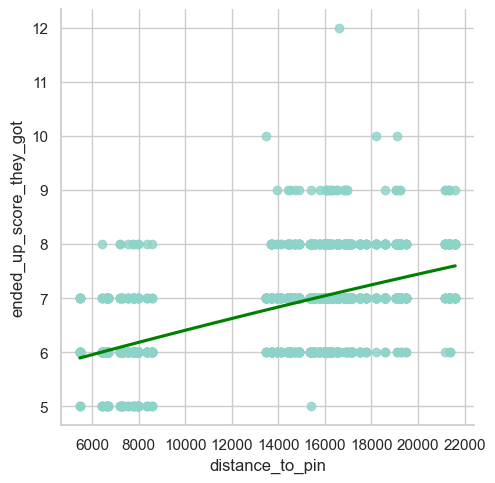

In [15]:
sns.lmplot(data = condensed_df, 
                x="distance_to_pin", 
                y="ended_up_score_they_got",  
                order=2,
                ci=None,
                line_kws={"color": kelly_green}
)

https://scottflaska.github.io/blog/posts/04_strokes_gained/